In [1]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
int_dir = os.path.join(data_dir,'interim')

In [3]:
grd_path = os.path.join(int_dir,'grd4_dV.nc')
grd = xr.open_dataset(grd_path)

file_path = os.path.join(data_dir,'raw','waom4','ocean_avg_0009_avg.nc')
tides = xr.open_dataset(file_path).squeeze()

In [27]:
tides['temp_depth_avg']=(tides.temp*grd.dV/grd.dV.sum('s_rho')).sum('s_rho')
tides['salt_depth_avg']=(tides.salt*grd.dV/grd.dV.sum('s_rho')).sum('s_rho')

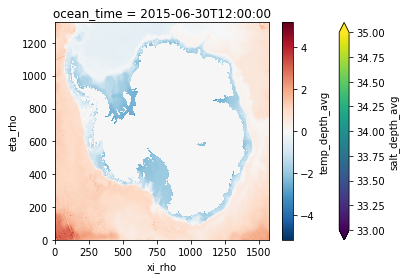

In [32]:
tides.salt_depth_avg.plot(vmin=33,vmax=35)
tides.temp_depth_avg.plot()

In [36]:
out=tides[['temp_depth_avg','salt_depth_avg','ubar','vbar']].drop('ocean_time')
out.to_netcdf(os.path.join(intdir,waom4_annual_depth_avg.nc')

In [33]:
tides

<xarray.Dataset>
Dimensions:         (eta_rho: 1325, eta_u: 1325, eta_v: 1324, s_rho: 31, xi_rho: 1575, xi_u: 1574, xi_v: 1575)
Coordinates:
  * s_rho           (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
    x_rho           (eta_rho, xi_rho) float64 ...
    y_rho           (eta_rho, xi_rho) float64 ...
    x_u             (eta_u, xi_u) float64 ...
    y_u             (eta_u, xi_u) float64 ...
    x_v             (eta_v, xi_v) float64 ...
    y_v             (eta_v, xi_v) float64 ...
    ocean_time      datetime64[ns] 2015-06-30T12:00:00
Dimensions without coordinates: eta_rho, eta_u, eta_v, xi_rho, xi_u, xi_v
Data variables:
    hc              float64 250.0
    Cs_r            (s_rho) float64 -0.9995 -0.997 ... -0.0008464 -9.329e-05
    h               (eta_rho, xi_rho) float64 ...
    zeta            (eta_rho, xi_rho) float32 ...
    m               (eta_rho, xi_rho) float32 ...
    ubar            (eta_u, xi_u) float32 ...
    vbar            (eta_v, xi_v) float32 ...
    u               (s_rho, eta_u, xi_u) float32 ...
    v               (s_rho, eta_v, xi_v) float32 ...
    temp            (s_rho, eta_rho, xi_rho) float32 0.72268695 ... 4.859014
    salt            (s_rho, eta_rho, xi_rho) float32 ...
    temp_depth_avg  (eta_rho, xi_rho) float64 3.31 3.32 3.219 ... 1.03 1.02
    salt_depth_avg  (eta_rho, xi_rho) float64 34.58 34.57 34.58 ... 34.65 34.65
Attributes:
    file:              ocean_avg_0009.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4
    type:              ROMS/TOMS nonlinear model averages file
    title:             Whole Antarctic and Ocean Application, 10 km resolution
    rst_file:          ocean_rst.nc
    his_base:          ocean_his
    avg_base:          ocean_avg
    grd_file:          /g/data2/gh9/oxr581/waom_frc/waom4_grd.nc
    ini_file:          ocean_rst.nc
    frc_file_01:       /g/data2/gh9/oxr581/waom_frc/waom4_tds.nc
    frc_file_02:       /g/data2/gh9/oxr581/waom_frc/waom4_shflux.nc
    frc_file_03:       /g/data2/gh9/oxr581/waom_frc/waom4_swflux.nc
    frc_file_04:       /g/data2/gh9/oxr581/waom_frc/waom4_sustr.nc
    frc_file_05:       /g/data2/gh9/oxr581/waom_frc/waom4_svstr.nc
    frc_file_06:       /g/data2/gh9/oxr581/waom_frc/waom4_nudge.nc
    bry_file:          /g/data2/gh9/oxr581/waom_frc/waom4_bry.nc
    script_file:       
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    svn_url:           https:://myroms.org/svn/src
    svn_rev:           exported
    code_dir:          /short/gh9/oxr581/waom4
    header_dir:        /short/gh9/oxr581/waom4/ROMS/Include
    header_file:       waom4.h
    os:                Linux
    cpu:               x86_64
    compiler_system:   ifort
    compiler_command:  /apps/openmpi/wrapper/fortran/mpif90
    compiler_flags:    -heap-arrays -fp-model precise -ip -O3 -free -free -free
    tiling:            048x048
    history:           Mon Jun  3 10:54:59 2019: ncra -v m,temp,salt,zeta,uba...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       waom4, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, A...
    NCO:               netCDF Operators version 4.7.7 (Homepage = http://nco....